In [4]:
# Created: 20250103

In [1]:
import pyutil as pyu
pyu.get_local_pyinfo()

'conda env: ml312-2024; pyv: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:27:36) [GCC 11.2.0]'

In [2]:
print(pyu.ps2("requests"))

requests==2.32.3



In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Download historical data
symbol = "^GSPC"  # S&P 500 as an example
start = "2020-01-01"
end = "2023-12-31"
data = yf.download(symbol, start=start, end=end)

# Step 2: Calculate Volume Profile
def calculate_volume_profile(data, bins=50):
    # Ensure the necessary columns exist
    if 'High' not in data.columns or 'Low' not in data.columns or 'Volume' not in data.columns:
        raise KeyError("Required columns ('High', 'Low', 'Volume') are missing in the data.")
    
    # Calculate the midpoint price for each day
    data['Mid Price'] = (data['High'] + data['Low']) / 2
    
    # Drop any rows with NaN values to ensure alignment
    valid_data = data.dropna(subset=['Mid Price', 'Volume'])
    
    # Define the price range
    price_min = valid_data['Mid Price'].min()
    price_max = valid_data['Mid Price'].max()
    
    # Create price bins
    price_bins = np.linspace(price_min, price_max, bins + 1)
    
    # Use np.histogram to calculate volume for each bin
    volume, bin_edges = np.histogram(valid_data['Mid Price'], bins=price_bins, weights=valid_data['Volume'])
    
    # Create a DataFrame for the volume profile
    volume_profile = pd.DataFrame({
        'Price Bin': bin_edges[:-1],
        'Volume': volume
    })
    
    return volume_profile

# Apply the Volume Profile calculation
try:
    volume_profile = calculate_volume_profile(data)
    print("Volume Profile:\n", volume_profile.head())  # Debug output to ensure it's created
except KeyError as e:
    print("KeyError:", e)
except Exception as e:
    print("An error occurred:", e)

# Step 3: Plot Volume Profile
if 'volume_profile' in locals() and not volume_profile.empty:
    plt.figure(figsize=(10, 7))
    plt.barh(volume_profile['Price Bin'], volume_profile['Volume'], 
             height=(volume_profile['Price Bin'].iloc[1] - volume_profile['Price Bin'].iloc[0]), 
             color='blue', alpha=0.7)
    plt.title(f'Volume Profile for {symbol}')
    plt.xlabel('Volume')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()
else:
    print("Volume Profile is not defined or empty.")


[*********************100%***********************]  1 of 1 completed

KeyError: ['Mid Price', 'Volume']
Volume Profile is not defined or empty.


In [4]:
def show_graph(symbol):

pass

[*********************100%***********************]  1 of 1 completed


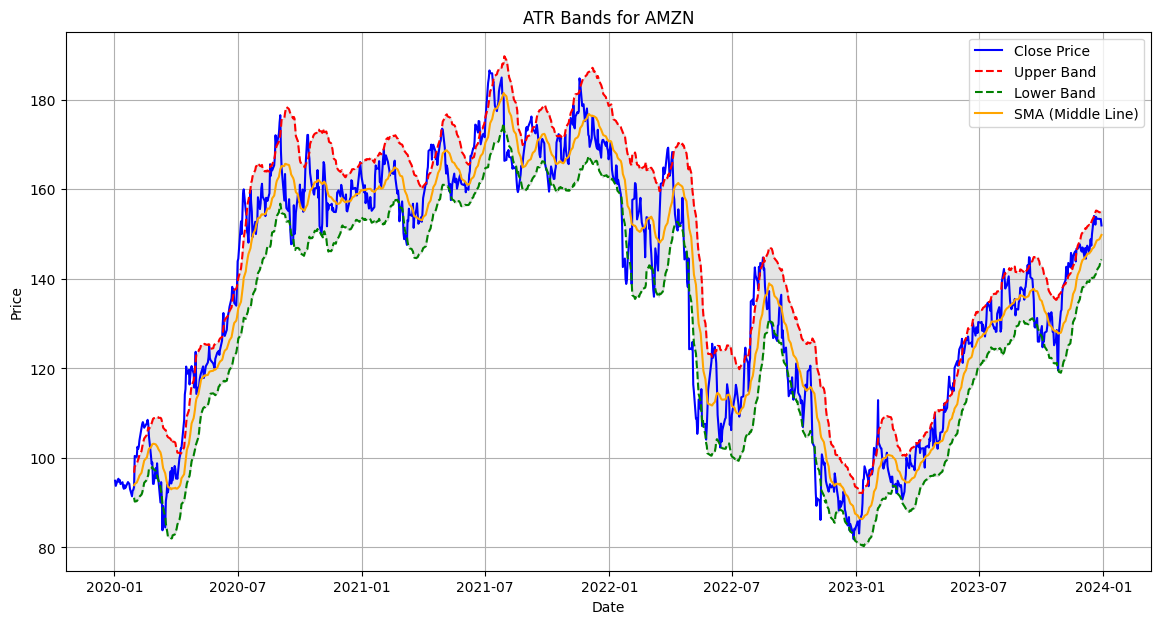

In [5]:
show_graph("AMZN")